#### 선형함수 
- 비용함수 : 한 모델이 여러가지 선형함수를 만들고 최적의 선형함수를 찾는 방법
 - 데이터를 가지고 여러가지 선형함수를 만듬
 - 어떤 선형함수가 모든 데이터를 잘 반영했는가? ( 최적의 함수를 찾을려고)
 - 만들어둔 선형함수를 비용함수에 집어 넣는다 (비용함수는 기준이 됨)
 - 각각의 선형함수가 비용함수를 출력
 - 비용함수가 가장 작았을때의 선형함수를 예측함수로 사용(평균제곱오차가 가장 작은 것 -> 0에 가깝도록)
 
 - 비용함수를 0에 가깝도록 만드는 방법 
     - 가중치를 조절해가면서 

# 성적 데이터 생성 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index=['해도','병관','기성','동원'],
                   columns=['시간','성적'])
data

,시간,성적
해도,2,20
병관,4,40
기성,8,80
동원,9,90


# 수학 공식을 이용한 해석적 모델 
- LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_model = LinearRegression()
 # 문제데이터는 인식하기 쉽도록 2차원 정답은 1차원
linear_model.fit(data[['시간']],data['성적'])

LinearRegression()

In [28]:
print('가중치 : ',linear_model.coef_)
print('절편 ',linear_model.intercept_)

가중치 :  [0.]
절편  57.5


In [29]:
linear_model.predict([[7]])

array([57.5])

# 경사하강법 
- 가중치의 변화에 따른 비용함수 값의 변화 그래프

## H(x)
- 예측함수
- h(x) = w * x + 0

In [31]:
def h(w, x):
    return w * x

## 비용 함수(Cost Function)
- 평균제곱오차

In [33]:
# data : 예측에 활용하는 데이터(문제)
# target : 실제 데이터(정답)
# weight : 가중치
def cost(data, target, weight) :
    y_pre = h(weight, data) # 예측값 생성
    return ((y_pre - target) ** 2).mean() # y_pre - target : 오차

In [38]:
cost(data['시간'],data['성적'], 11)

41.25

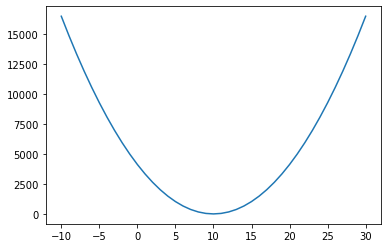

In [45]:
weight_arr = range(-10,31)

cost_list = []
for w in weight_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)


plt.plot(weight_arr, cost_list)
plt.show()

# 3.3 SGDRegressor
- 경사하강법을 활용한 모델

In [46]:
from sklearn.linear_model import SGDRegressor

In [48]:
sgd_model = SGDRegressor(max_iter = 500, # 가중치 업데이트 횟수
                        eta0 = 0.01, # 학습률 (learning rate) -- 정답률 높이도록 조정필요(0~1 까지인데 0.1을 기준)
                        verbose = 1) # 학습 과정 확인 디폴트디폴트0으로 두면 아무 것도 안나옴
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 9.15, NNZs: 1, Bias: 1.045736, T: 4, Avg. loss: 1039.050060
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.67, NNZs: 1, Bias: 1.118003, T: 8, Avg. loss: 5.682015
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.78, NNZs: 1, Bias: 1.127245, T: 12, Avg. loss: 0.577591
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.83, NNZs: 1, Bias: 1.129270, T: 16, Avg. loss: 0.184112
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.83, NNZs: 1, Bias: 1.125203, T: 20, Avg. loss: 0.138629
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.85, NNZs: 1, Bias: 1.122897, T: 24, Avg. loss: 0.135632
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.84, NNZs: 1, Bias: 1.118129, T: 28, Avg. loss: 0.130334
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.85, NNZs: 1, Bias: 1.115461, T: 32, Avg. loss: 0.131600
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.84, NNZs: 1, Bias: 1.110928, T: 36, Avg. loss: 0.128163
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=500, verbose=1)

In [49]:
sgd_model.predict([[7]])

array([70.04118826])

In [51]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.86052386]
[1.01752125]


 - Lasso : 특정값(가중치)들에게 일정한 값을 빼서 규제를 가함 // 가중치가 0이되는 특성들이 생긴다.->0이 되는 것들 사용x
 - 규제를 작게 가하면 LinearRegressor 모델과 같아짐
     - 특성(x)      1, 2, 3, 4, 5
     - 가중치(w)    3, 4, 6, 1, 2
     - 규제,일반숫자(-3)     0, 1, 3, 0, 0
         - 이렇게 되면 0이 되는 값이 나오게 되어 사용하지 못하는 특성이 생긴다

- Ridge : 특정값(가중치)들에 일정한 퍼센트를 곱해서 규제를 가함 // 가중치가 0에 가까워지고, 0이 되진 않음, 가중치들이 일정 비율로 줄어듬->모든특성 사용
- 규제를 작게 가하면 LinearRegressor 모델과 같아짐

     - 특성(x)      1, 2, 3, 4, 5
     - 가중치(w)    3, 4, 6, 1, 2
     - 10%제약     0.3, 0.4, 0.6, 0.1, 0.2
         - 이렇게 되면 0이 아닌 값이 나오게 되어 모든 특성을 사용한다